In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Step by Step How this Project is built

# 1. Data Cleaning
# 2. EDA (Exploratory Data Analysis)
# 3. Data Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Model Deployment


## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Droping unwanted columns

In [24]:
#df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.sample(5)

,Target,Text,num_Characters,num_words,num_sentences
4089,1,We tried to call you re your reply to our sms ...,135,27,0
2290,0,"HEY THERE BABE, HOW U DOIN? WOT U UP 2 2NITE L...",58,14,2
3982,0,Nationwide auto centre (or something like that...,83,14,1
3745,0,I'm not. She lip synced with shangela.,38,7,2
3653,0,Why i come in between you people,32,7,0


In [25]:
# Renaming the cols
df.rename(columns={'v1':"Target",'v2':"Text"},inplace=True)

In [26]:
encoder = LabelEncoder()

In [27]:
df["Target"]=encoder.fit_transform(df['Target'])

In [28]:
df.head()

,Target,Text,num_Characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [29]:
# Missing Values
df.isnull().sum()

Target            0
Text              0
num_Characters    0
num_words         0
num_sentences     0
dtype: int64

In [30]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [31]:
# Remove duplicate value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [32]:
df.shape

(5169, 5)

# EDA 

In [33]:
df.head()

,Target,Text,num_Characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [34]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

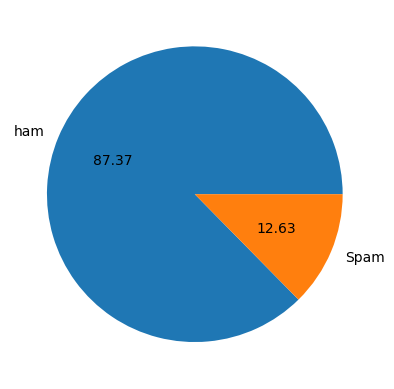

In [35]:
plt.pie(df['Target'].value_counts(),labels=["ham","Spam"],autopct='%0.2f')
plt.show()

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df['num_Characters']=df["Text"].apply(len)

In [38]:
df['num_words'] = df['Text'].fillna("").apply(lambda x: len(x.split()))
df['num_sentences'] = df['Text'].fillna("").apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)

In [39]:
df.head()

,Target,Text,num_Characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [41]:
df[['num_Characters', 'num_words', 'num_sentences']].describe()

,num_Characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [ ]:
#Hem
df[df['Target'] == 0][['num_Characters', 'num_words', 'num_sentences']].describe()


,num_Characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [46]:
# Spam Messages
df[df['Target'] == 1][['num_Characters', 'num_words', 'num_sentences']].describe()


,num_Characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


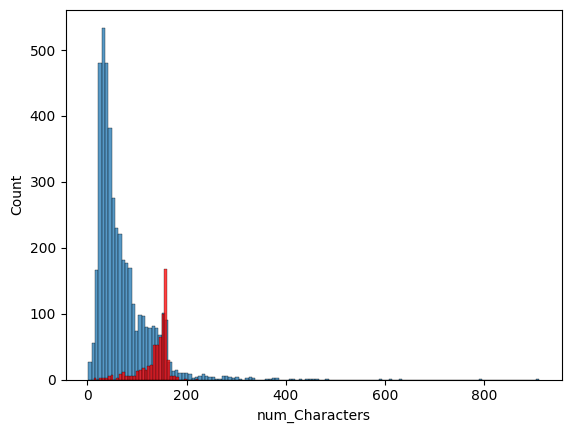

In [50]:
sns.histplot(df[df['Target']==0]['num_Characters'])
sns.histplot(df[df['Target']==1]['num_Characters'],color='red')
plt.show()